In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("benchmarks/current_benchmark.json", "r") as f:
    data = json.load(f)


In [3]:
score_names = ["score","percent_rescued","score_timestep","score_health_returned","score_exploration","percent_drones_destroyed"]

scores = {name:{} for name in score_names}
for d in data:
    for name in score_names:
        if d["map_name"] not in scores[name]:
            scores[name][d["map_name"]] = []
        scores[name][d["map_name"]].append(d["rounds"][0][name])

In [4]:
def plot_score(scores, title:str):
    # Prepare data for boxplot
    keys = list(scores.keys())
    values = list(scores.values())
    
    # Create the boxplot
    plt.figure(figsize=(10, 8))
    boxplot = plt.boxplot(values, labels=keys, patch_artist=True, showmeans=False, 
                          boxprops=dict(facecolor='skyblue', color='blue'),
                          whis=[0, 100])
    
    # Add labels and title
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0,100)
    
    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


In [5]:
for map_name in scores["score"]:
    print(map_name, len(scores["score"][map_name]))

MyMapFinal2022_23_none 20
MyMapFinal2022_23_no_gps_zone 20
MyMapFinal2022_23_no_com_zone 19
MyMapFinal2022_23_kill_zone 20
MyMapFinal_2023_24_01_none 20
MyMapFinal_2023_24_02_none 20
MyMapFinal_2023_24_03_none 20
MyMapFinal_2023_24_01_no_com_zone 20
MyMapFinal_2023_24_02_kill_zone 20
MyMapFinal_2023_24_03_no_gps_zone 20


Mean score: 74.92503892319579
Old score: 77.76108812954497


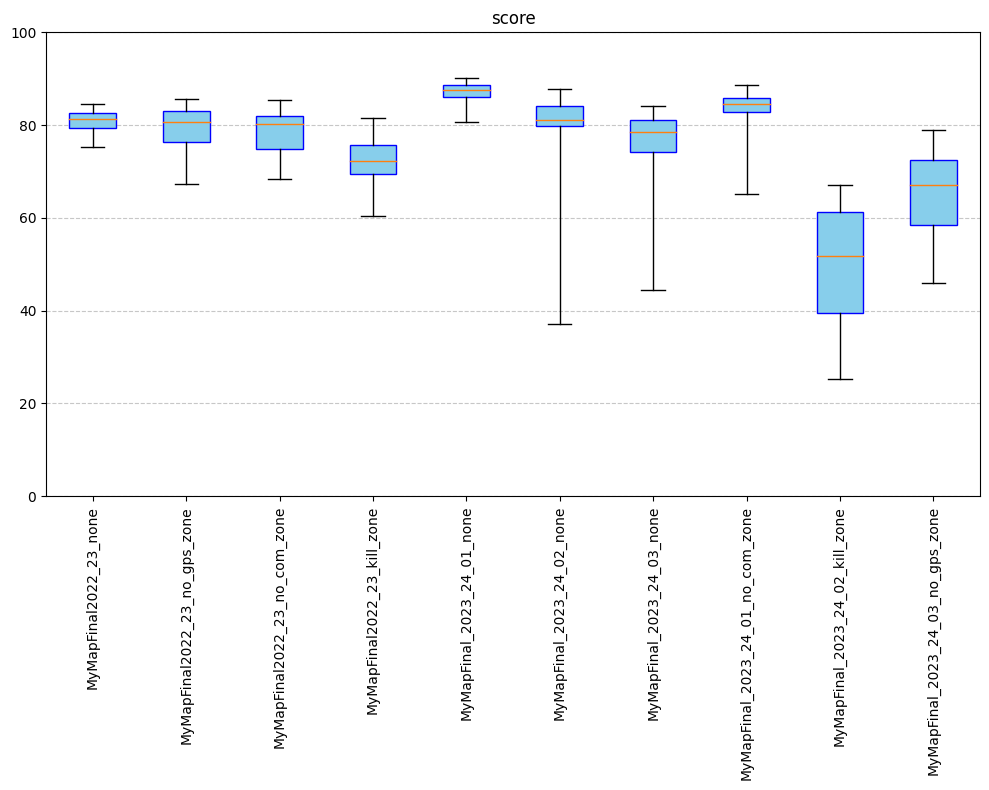

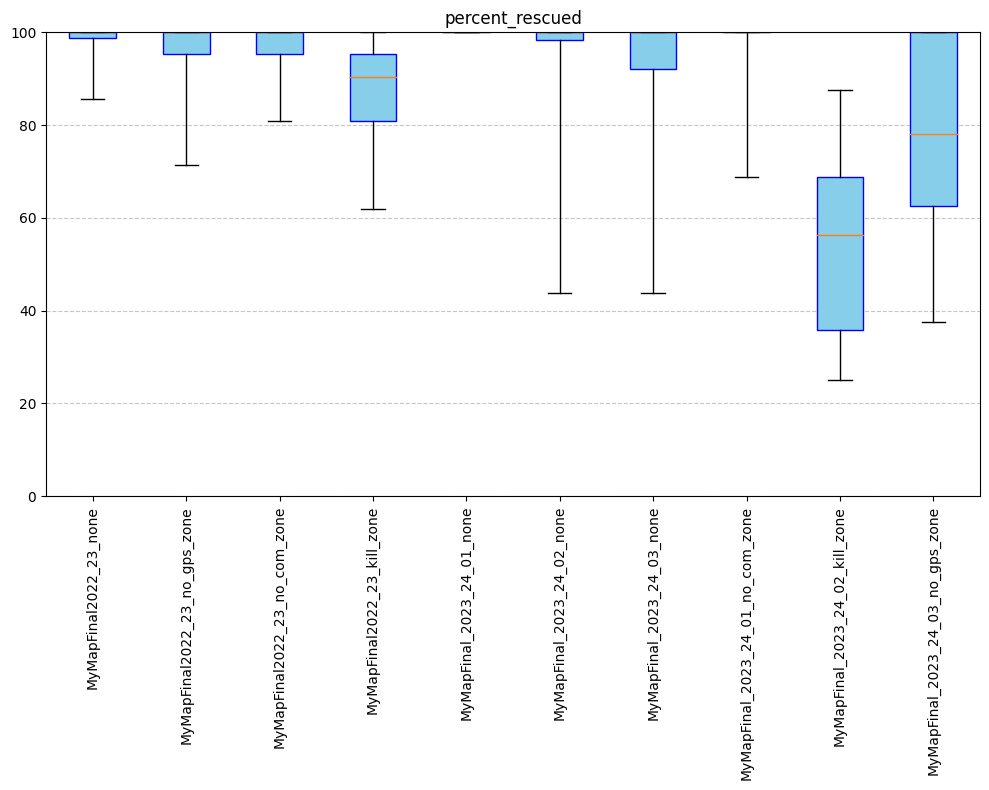

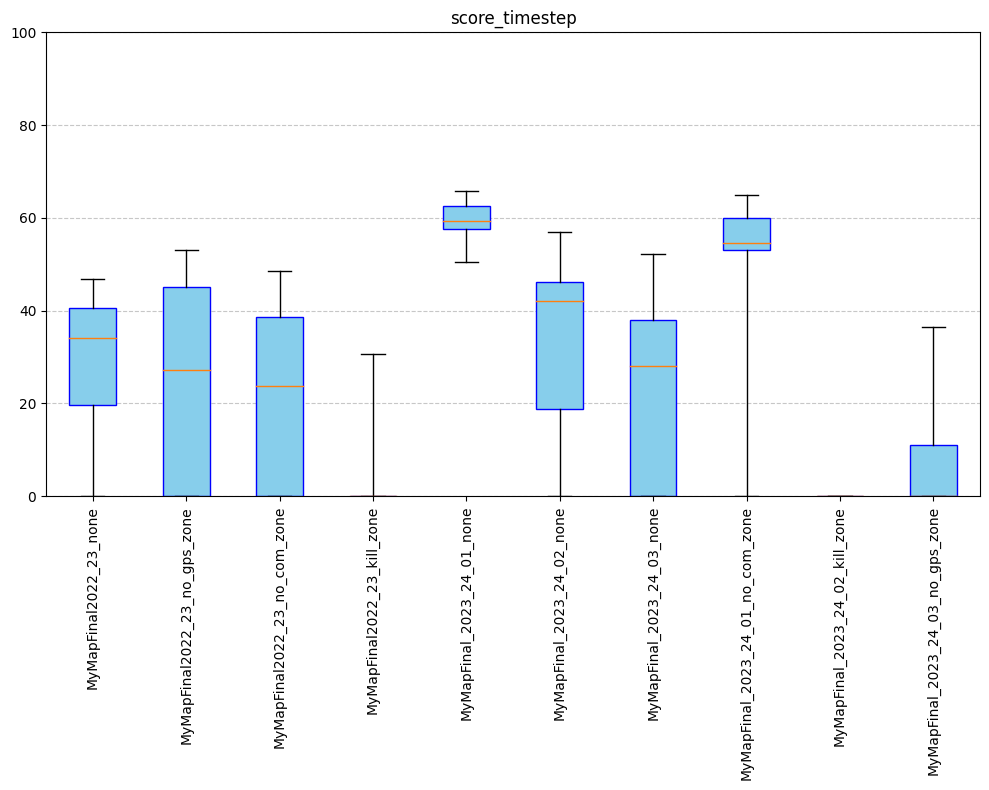

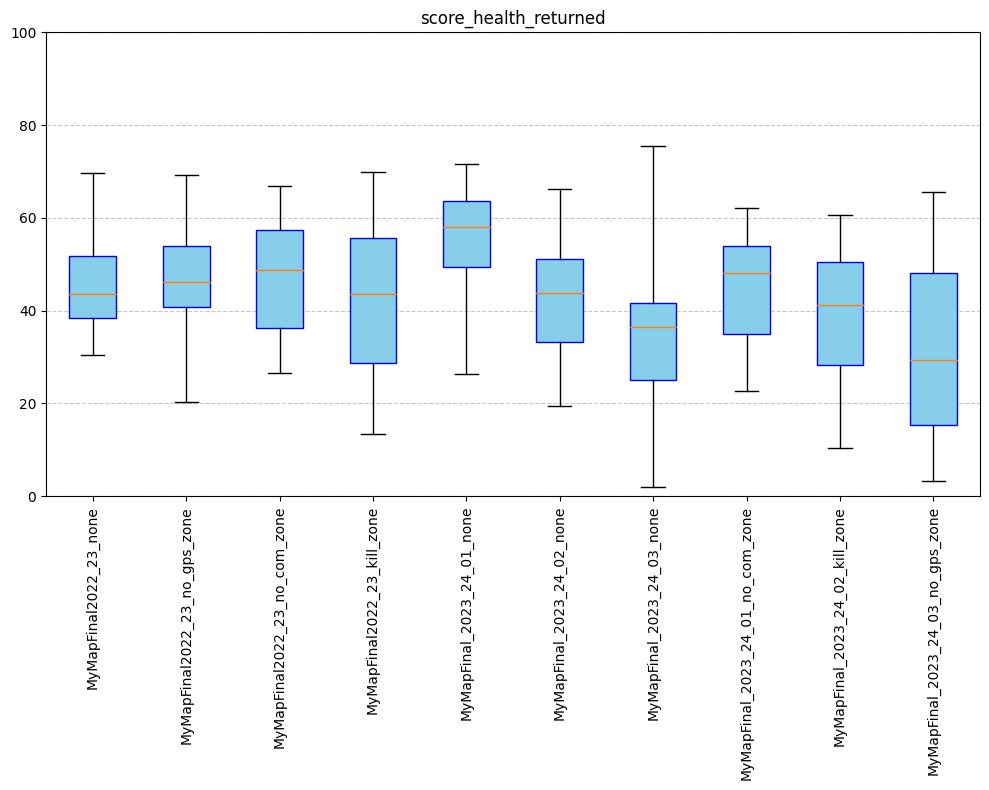

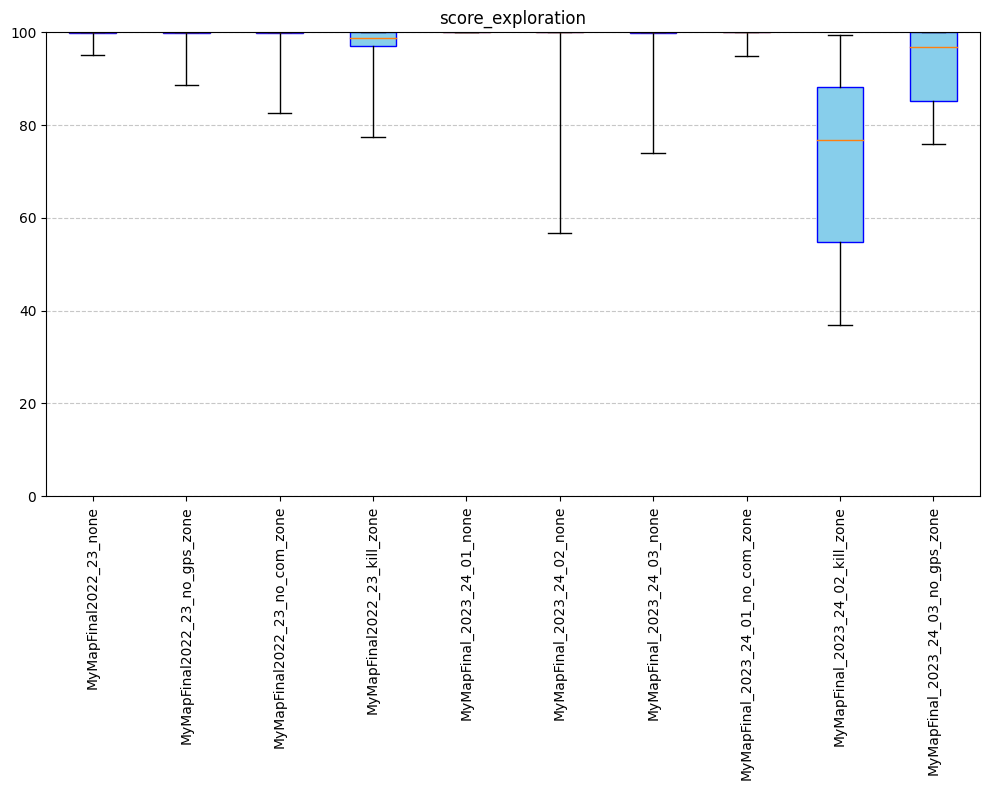

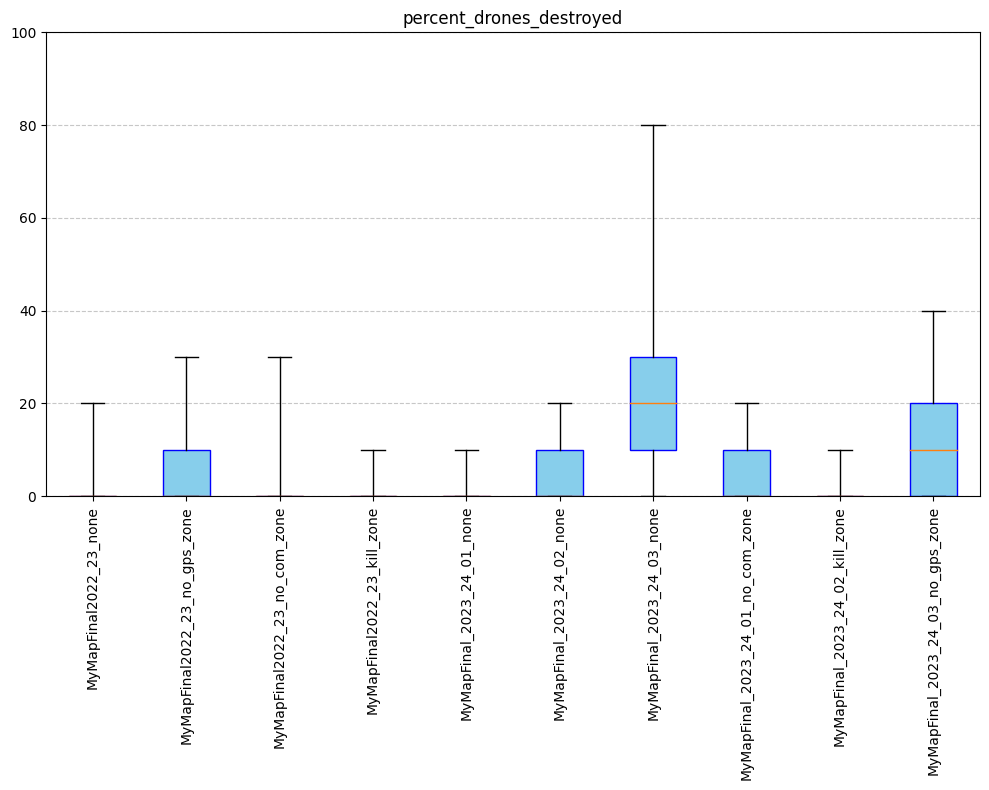

In [6]:
total_score = []
old_score = []
count = 0

for map_name in scores["score"]:
    if "22-23" in map_name:
        total_score.append(0.5*np.mean(scores["score"][map_name]))
        old_score.append(0.5*(0.6*np.mean(scores["percent_rescued"][map_name])+
                              0.2*np.mean(scores["score_exploration"][map_name])+
                              0.2*np.mean(scores["score_timestep"][map_name])))
        count += 0.5
    else:
        total_score.append(np.mean(scores["score"][map_name]))
        old_score.append(0.6*np.mean(scores["percent_rescued"][map_name])+
                              0.2*np.mean(scores["score_exploration"][map_name])+
                              0.2*np.mean(scores["score_timestep"][map_name]))
        count += 1
print("Mean score:",sum(total_score)/count)
print("Old score:",sum(old_score)/count)

for name in score_names:
    plot_score(scores[name], name)